## Importing the Libraries

In [1]:
import pandas as pd
import numpy as ny
import mglearn
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.font_manager import FontProperties 
from matplotlib.ticker import AutoMinorLocator
import statsmodels.api as sm
import scipy.stats as st
import seaborn as sns
import seaborn as sbn
import matplotlib.mlab as mlab
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, precision_recall_curve, auc, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay


## Importing Dataset

In [2]:
#importing and reading the dataset

data = pd.read_csv(r'C:\Users\umehu\OneDrive\Desktop\ICA\OKOBI\diabetes.csv')

In [3]:
# viewing the first 5 rows of the data 

data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
# Showing Statistical description of the dataset (mean, count, std, 25%, 50%, 75%, max)

data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Removing missing dataset

In [5]:
#Removing null value from the data set

count = 0
for i in data.isnull().sum(axis = 1):
    if i>0:
        count = count + 1
print("Total number of rows with missing values is:",count)
print("since it is only",round((count/len(data.index))* 100), "percent of the entire dataset the rows with missing values are excluded")

data.dropna(axis = 0, inplace = True)
data.describe()

Total number of rows with missing values is: 0
since it is only 0 percent of the entire dataset the rows with missing values are excluded


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
data.head ()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [7]:
#information on each attribute and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [8]:
#transform data
data['Diabetes_binary'] = data['Diabetes_binary'].astype('int')
data['HighBP'] = data['HighBP'].astype('int')
data['HighChol'] = data['HighChol'].astype('int')
data['CholCheck'] = data['CholCheck'].astype('int')
data['BMI'] = data['BMI'].astype('int')
data['Smoker'] = data['Smoker'].astype('int')
data['Stroke'] = data['Stroke'].astype('int')
data['HeartDiseaseorAttack'] = data['HeartDiseaseorAttack'].astype('int')
data['PhysActivity'] = data['PhysActivity'].astype('int')
data['Fruits'] = data['Fruits'].astype('int')
data['Veggies'] = data['Veggies'].astype('int')

data['HvyAlcoholConsump'] = data['HvyAlcoholConsump'].astype('int')
data['AnyHealthcare'] = data['AnyHealthcare'].astype('int')
data['NoDocbcCost'] = data['NoDocbcCost'].astype('int')
data['GenHlth'] = data['GenHlth'].astype('int')
data['MentHlth'] = data['MentHlth'].astype('int')
data['PhysHlth'] = data['PhysHlth'].astype('int')
data['DiffWalk'] = data['DiffWalk'].astype('int')
data['Sex'] = data['Sex'].astype('int')
data['Age'] = data['Age'].astype('int')
data['Education'] = data['Education'].astype('int')
data['Income'] = data['Income'].astype('int')
data.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int32
 1   HighBP                70692 non-null  int32
 2   HighChol              70692 non-null  int32
 3   CholCheck             70692 non-null  int32
 4   BMI                   70692 non-null  int32
 5   Smoker                70692 non-null  int32
 6   Stroke                70692 non-null  int32
 7   HeartDiseaseorAttack  70692 non-null  int32
 8   PhysActivity          70692 non-null  int32
 9   Fruits                70692 non-null  int32
 10  Veggies               70692 non-null  int32
 11  HvyAlcoholConsump     70692 non-null  int32
 12  AnyHealthcare         70692 non-null  int32
 13  NoDocbcCost           70692 non-null  int32
 14  GenHlth               70692 non-null  int32
 15  MentHlth              70692 non-null  int32
 16  Phys

In [10]:
#list of numerical attributes whoes Dtype is Int64 or Float64

numeric_features = ["Diabetes_binary", "HighBP", "HighChol",
                   "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "AnyHealthcare",
                    "Sex", "Age", "Education", "Income"]

In [15]:
data_counts = data.groupby(data.Education).count()
display(data_counts)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
Education,,,,,,,,,,,,,,,,,,,,,
1,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
2,1647,1647,1647,1647,1647,1647,1647,1647,1647,1647,...,1647,1647,1647,1647,1647,1647,1647,1647,1647,1647
3,3447,3447,3447,3447,3447,3447,3447,3447,3447,3447,...,3447,3447,3447,3447,3447,3447,3447,3447,3447,3447
4,19473,19473,19473,19473,19473,19473,19473,19473,19473,19473,...,19473,19473,19473,19473,19473,19473,19473,19473,19473,19473
5,20030,20030,20030,20030,20030,20030,20030,20030,20030,20030,...,20030,20030,20030,20030,20030,20030,20030,20030,20030,20030
6,26020,26020,26020,26020,26020,26020,26020,26020,26020,26020,...,26020,26020,26020,26020,26020,26020,26020,26020,26020,26020


In [410]:
#comfirm that there is no null and missing data
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [19]:
num_years = 4
mins_per_hour = 60
total_secs = num_years * mins_per_hour
print(total_secs)

240


In [411]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


## Data visualization

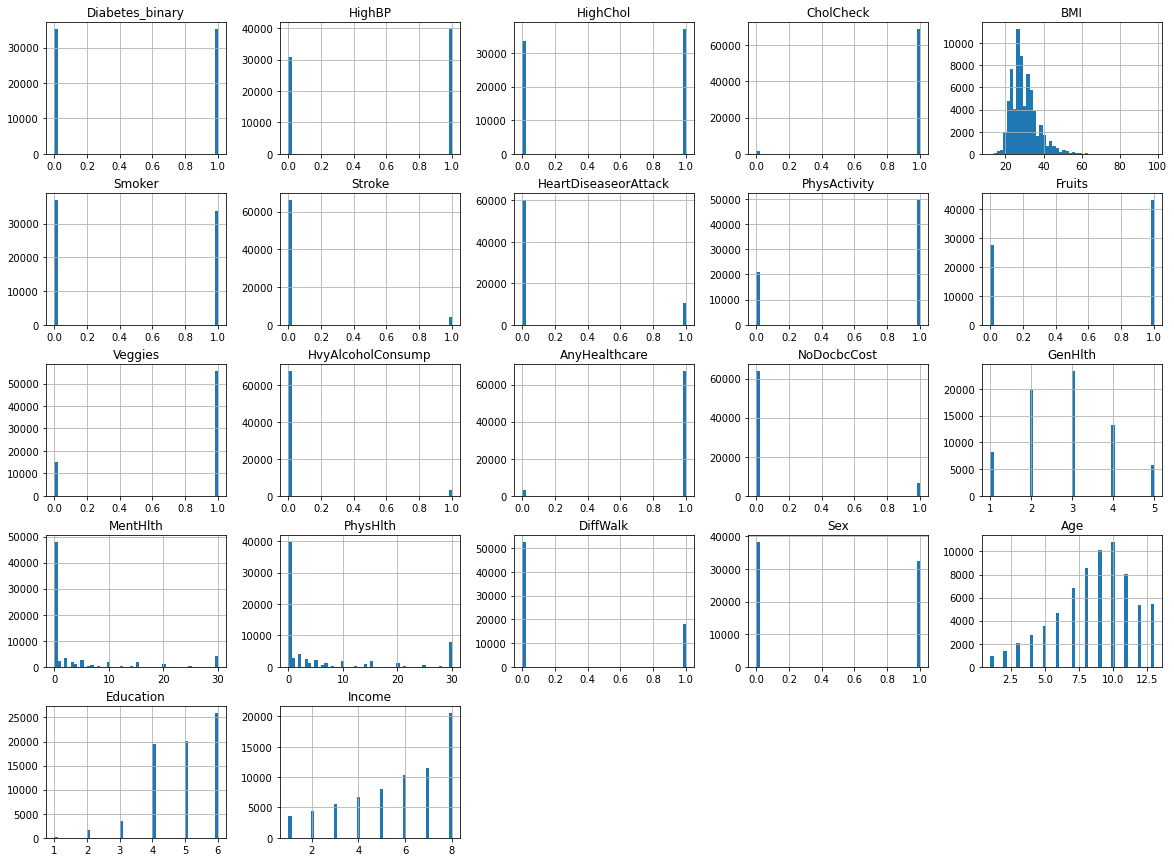

In [412]:
#Exploring the distribution of the numerical data

data.hist(bins=50, figsize=(20,15))
plt.show()

In [413]:
#Checking for correlation between the features and the target value.

data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int32
 1   HighBP                70692 non-null  int32
 2   HighChol              70692 non-null  int32
 3   CholCheck             70692 non-null  int32
 4   BMI                   70692 non-null  int32
 5   Smoker                70692 non-null  int32
 6   Stroke                70692 non-null  int32
 7   HeartDiseaseorAttack  70692 non-null  int32
 8   PhysActivity          70692 non-null  int32
 9   Fruits                70692 non-null  int32
 10  Veggies               70692 non-null  int32
 11  HvyAlcoholConsump     70692 non-null  int32
 12  AnyHealthcare         70692 non-null  int32
 13  NoDocbcCost           70692 non-null  int32
 14  GenHlth               70692 non-null  int32
 15  MentHlth              70692 non-null  int32
 16  Phys

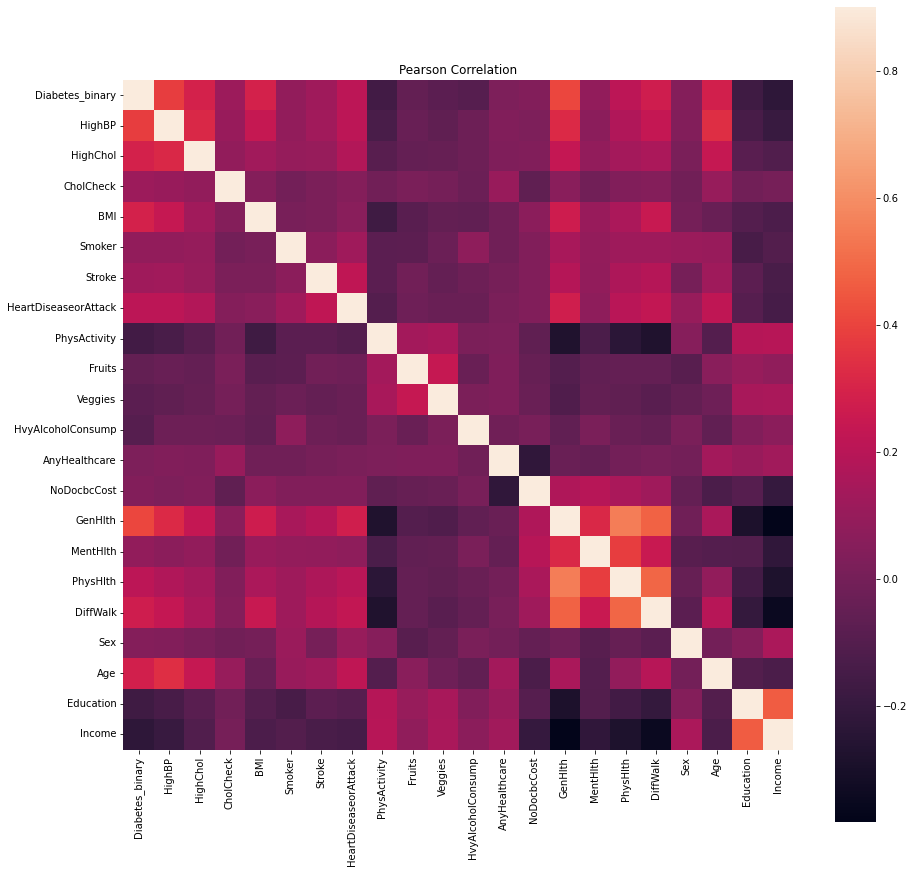

In [420]:
#heatmap correlation
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

<Figure size 1800x1800 with 0 Axes>

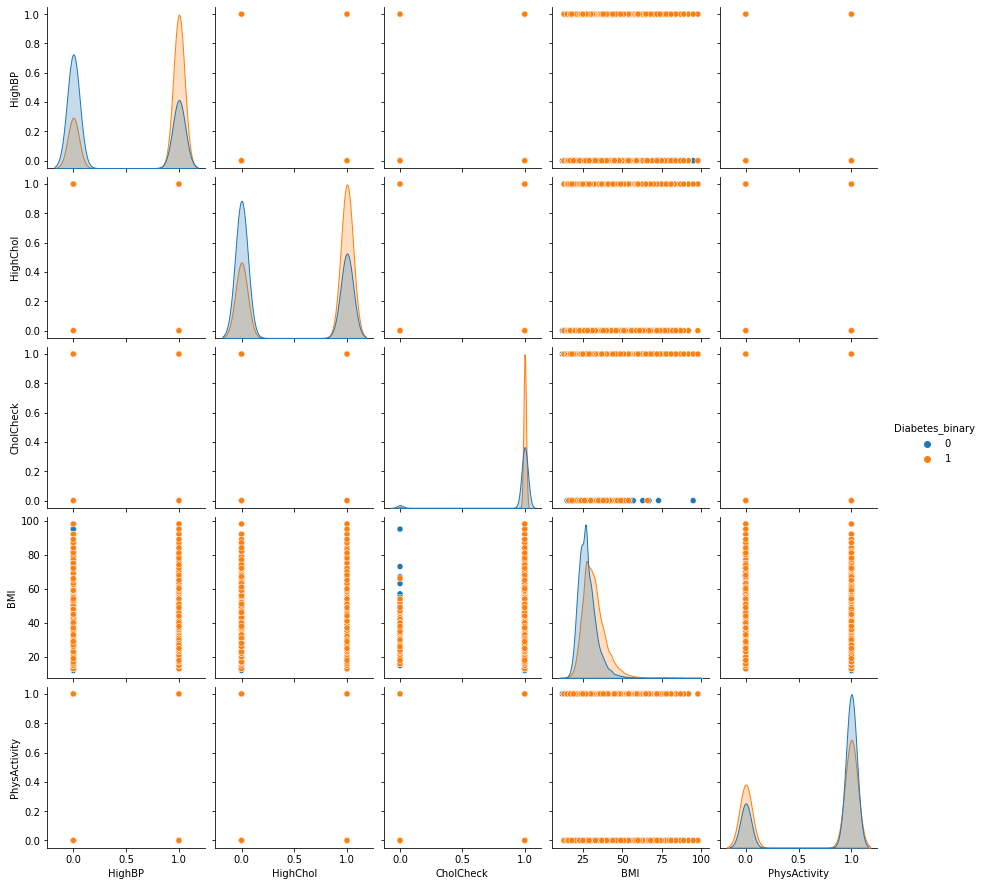

In [421]:
plt.figure(figsize = (25, 25))
sbn.pairplot(data[["HighBP", "HighChol", "CholCheck", "BMI", "PhysActivity", "Diabetes_binary"]], hue = "Diabetes_binary")
plt.show()

C:\Users\umehu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetes_binary', ylabel='count'>

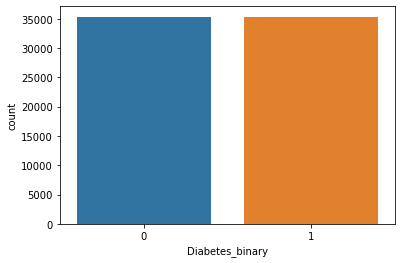

In [422]:
sns.countplot(data.Diabetes_binary)

Text(0.5, 1.0, 'correlation between Physical Activity and BMI')

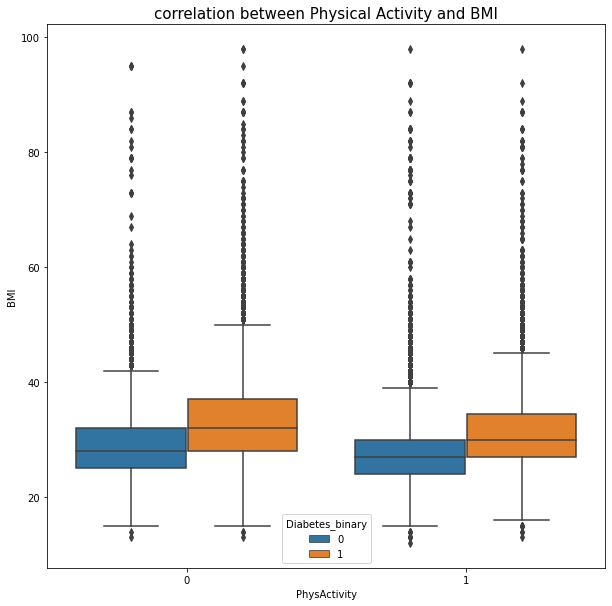

In [423]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'PhysActivity', y = 'BMI', data = data, hue = 'Diabetes_binary')
plt.title("correlation between Physical Activity and BMI", size = 15)

In [424]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


Text(0.5, 1.0, 'HighBP impact on Diabetes')

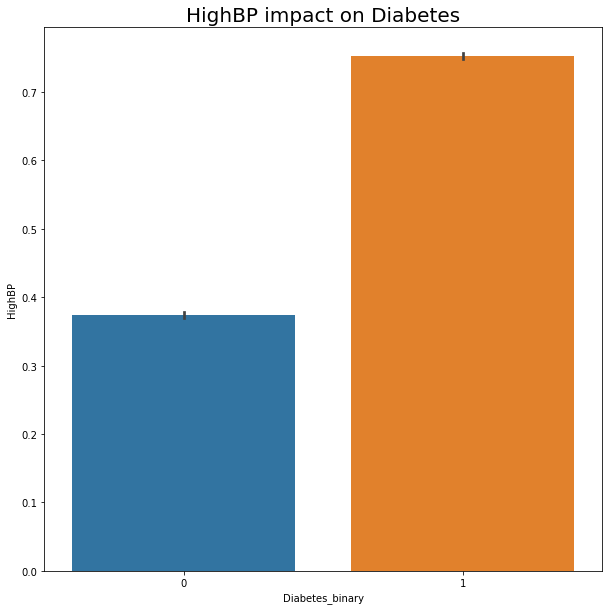

In [425]:
plt.figure(figsize=(10,10))
sns.barplot(x="Diabetes_binary",y="HighBP",data=data)

plt.title("HighBP impact on Diabetes", size = 20)

Text(0.5, 1.0, 'HighChol impact on Diabetes')

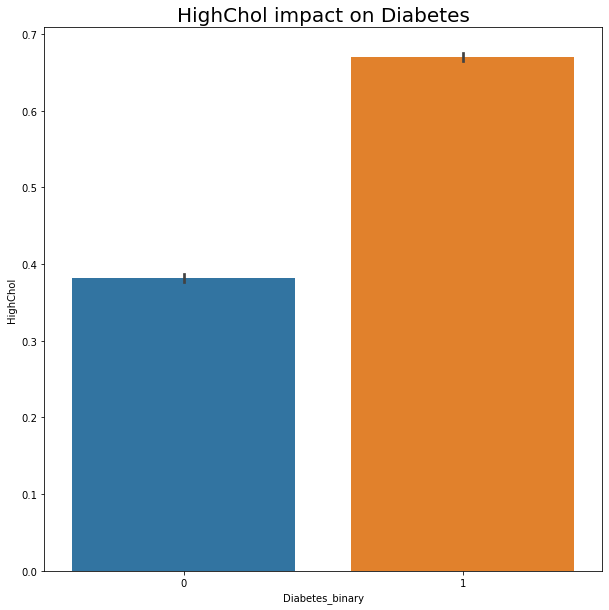

In [426]:
plt.figure(figsize=(10,10))
sns.barplot(x="Diabetes_binary",y="HighChol",data=data)

plt.title("HighChol impact on Diabetes", size = 20)

In [427]:
data.head ()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


Text(0.5, 1.0, 'corelation between age and diabeties')

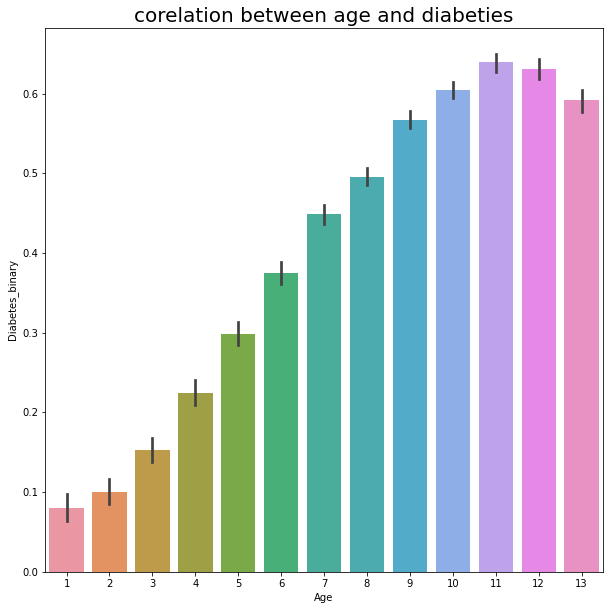

In [428]:
plt.figure(figsize=(10,10))
sns.barplot(x="Age",y="Diabetes_binary",data=data)

plt.title("corelation between age and diabeties", size = 20)

In [429]:
data.head ()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


Text(0.5, 1.0, 'Impact of Physical Health on BMI')

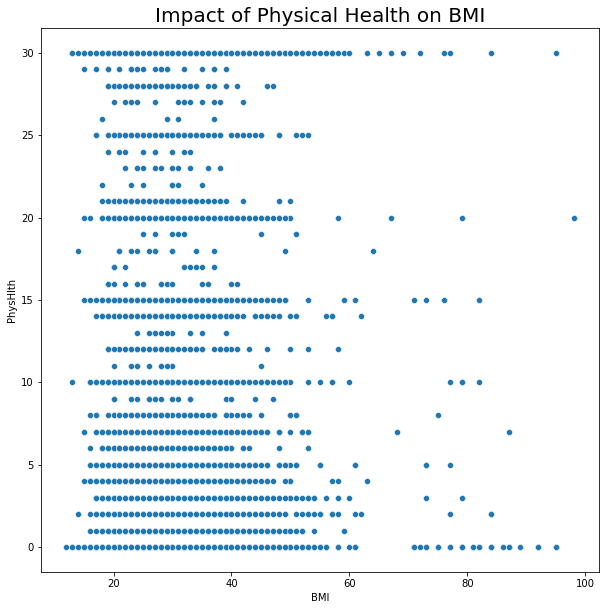

In [430]:
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'PhysHlth', x = 'BMI',data=data[data.Diabetes_binary==0])
plt.title("Impact of Physical Health on BMI", size = 20)

# Spliting the dataset 


Train  Set = 80%

Test Set = 30%

In [460]:
#split data
X = data.drop('Diabetes_binary', axis = 1)
y = data['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(49484, 21)
(49484,)
(21208, 21)
(21208,)


In [461]:
len(X_train), len(X_test)

(49484, 21208)

### Evaluating the models

### Logistics Regression

In [462]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\umehu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [464]:
y_pred = log_reg.predict(X_test)
print('Train Score is : ' , log_reg.score(X_train, y_train))
print('Test Score is : ' , log_reg.score(X_test, y_test))

Train Score is :  0.7419569962007921
Test Score is :  0.7440588457185967


In [465]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74     10601
           1       0.73      0.77      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



The accuracy score is: 0.7440588457185967

 Confusion matrix 
 
 [[7643 2958]
 [2470 8137]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     10601
           1       0.73      0.77      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



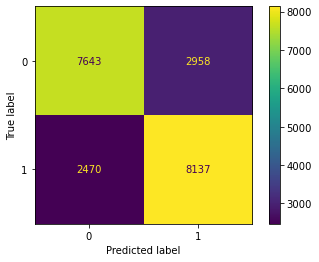

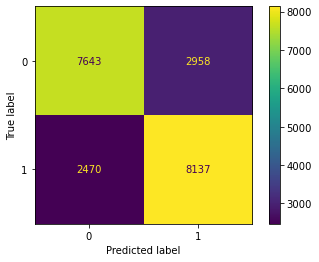

In [466]:
# accuracy score
print('The accuracy score is:', accuracy_score(y_test, y_pred)) 

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

# old plotting method
plot_confusion_matrix(log_reg, X_test, y_test) 
plt.show()

 # new plotting method 
disp = ConfusionMatrixDisplay(cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

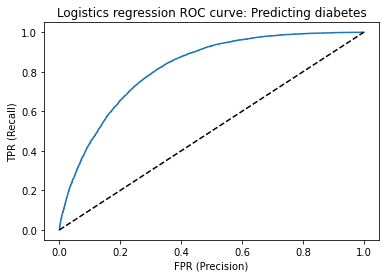

Area under curve (AUC):  0.8187352129120558


In [474]:
y_score = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)  

plt.title('Logistics regression ROC curve: Predicting diabetes')
plt.xlabel('FPR (Precision)') # false positive rate
plt.ylabel('TPR (Recall)')   # true positive rate

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) 

### Ramdom Forest

In [470]:
#Creating an instance of the Random forest classifier
rfc = RandomForestClassifier()

#Training the model on the training set
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [471]:
y_pred = rfc.predict(X_test)
print('Train Score is : ' , rfc.score(X_train, y_train))
print('Test Score is : ' , rfc.score(X_test, y_test))

Train Score is :  0.9954732842939131
Test Score is :  0.7395322519803847


In [472]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.76      0.70      0.73     10601
           1       0.72      0.78      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



The accuracy score is: 0.7395322519803847

 Confusion matrix 
 
 [[7410 3191]
 [2333 8274]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     10601
           1       0.72      0.78      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



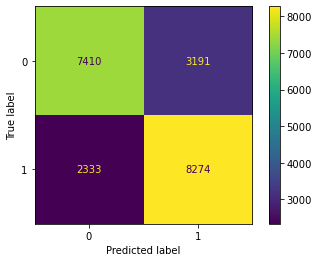

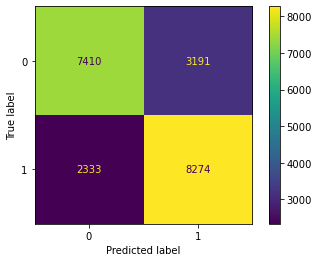

In [473]:
# accuracy score

print('The accuracy score is:', accuracy_score(y_test, y_pred)) 

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)  
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

# old plotting method
plot_confusion_matrix(rfc, X_test, y_test) 
plt.show()

# new plotting method 
disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_) 
disp.plot()
plt.show()

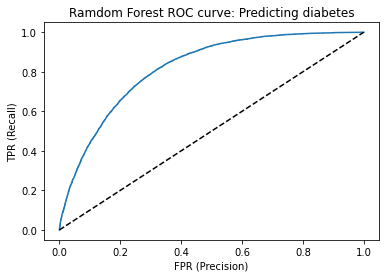

Area under curve (AUC):  0.8187352129120558


In [475]:
y_score = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)  

plt.title('Ramdom Forest ROC curve: Predicting diabetes')
plt.xlabel('FPR (Precision)') # false positive rate
plt.ylabel('TPR (Recall)')   # true positive rate

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) 

### Gaussian Naive Base

In [480]:
#Creating an instance of the Gaussian Naive Base
GNB = GaussianNB()

#Training the model on the training set
GNB.fit(X_train, y_train)

GaussianNB()

In [483]:
y_pred = GNB.predict(X_test)
print('Train Score is : ' , GNB.score(X_train, y_train))
print('Test Score is : ' , GNB.score(X_test, y_test))

Train Score is :  0.7188788295206532
Test Score is :  0.7206714447378347


In [484]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72     10601
           1       0.72      0.71      0.72     10607

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



The accuracy score is: 0.7206714447378347

 Confusion matrix 
 
 [[7732 2869]
 [3055 7552]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72     10601
           1       0.72      0.71      0.72     10607

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



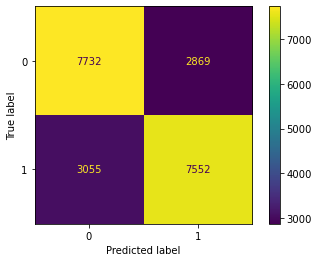

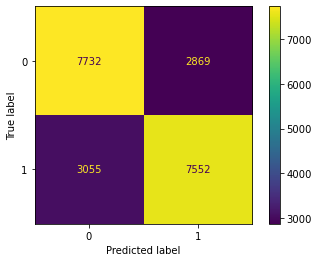

In [486]:
# accuracy score

print('The accuracy score is:', accuracy_score(y_test, y_pred)) 

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)  
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

# old plotting method
plot_confusion_matrix(GNB, X_test, y_test) 
plt.show()

# new plotting method 
disp = ConfusionMatrixDisplay(cm, display_labels=GNB.classes_) 
disp.plot()
plt.show()

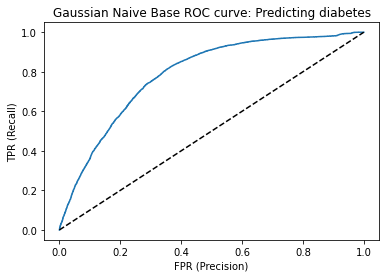

Area under curve (AUC):  0.787555942890275


In [494]:
y_score = GNB.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)  

plt.title('Gaussian Naive Base ROC curve: Predicting diabetes')
plt.xlabel('FPR (Precision)') # false positive rate
plt.ylabel('TPR (Recall)')   # true positive rate

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr)) 